Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
### Datasets ###

red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')

# Size of red wine data
red_wine = red_wine.drop_duplicates()
print('Size of red wine data', red_wine.shape)

# Size of white wine data
white_wine = white_wine.drop_duplicates()
print('Size of white wine data ',white_wine.shape)

Size of red wine data (1359, 12)
Size of white wine data  (3961, 12)


In [ ]:
## Data Wrangling ## 

# Get a feel...
#red_wine.head(10) # viewing first 10 entries to get a feel for the data values and the anatomy of the dataframe (columns, indices)
#red_wine.tail(10)  # viewing last 10 entries to get a feel for the data and rest of the anatomy of the dataframe (columns, indices)

# Size 
#white_wine = white_wine.drop_duplicates()
#white_wine.shape

# Missing values 
#red_wine.info() # to see size, data tpes, non-null count
red_wine.isna().sum() # missing value count per column 
#red_wine.dtypes # to check for types of data present 

# Outliers 
#red_wine.describe()
#firstcheck_outlier(red_wine.describe())



In [ ]:
# First check for outliers using only quartile info 
def firstcheck_outlier(des_df):

    for col in des_df.columns:
        
        q1 = des_df.loc['25%', col]
        q3 = des_df.loc['75%',col]
        l = q1 - 1.5*(q3-q1)
        u = q3 + 1.5*(q3-q1)
        
        outlier_fence = [l,u]

        if des_df.loc['min', col] < l:
            print('outliers in ', col)
        
        if des_df.loc['max', col] > u:
            print('outliers in ', col)

In [ ]:
### white wine basic info ####

white_wine.describe()
firstcheck_outlier(white_wine.describe())

1. No null values in data of red and white wines. 
2. Yes, outliers in data of red and white wines. 


In [77]:
##### Feature Engineering #####

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'



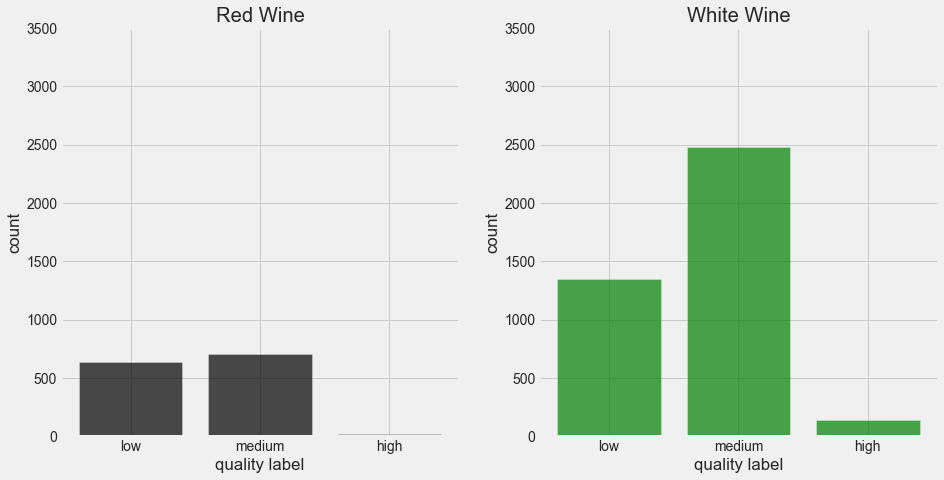

In [78]:
## Red Wine and White Wine Comparison ## 

r = red_wine.groupby(by='quality_label').count().iloc[:,0]
w = white_wine.groupby(by='quality_label').count().iloc[:,0]

# Using figure and subplot objects 

plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.set_size_inches(14, 7)

ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(bottom=0, top=3500)
ax1.title.set_text('Red Wine')
ax1.bar(r.index.categories, r.values, color='k', alpha=0.7)
plt.xlabel('quality label'); plt.ylabel('count')

ax2 = fig.add_subplot(1,2,2, sharey=ax1)
ax2.bar(w.index.categories, w.values, color='g', alpha=0.7)
ax2.title.set_text('White Wine')

plt.xlabel('quality label'); plt.ylabel('count')
plt.show()


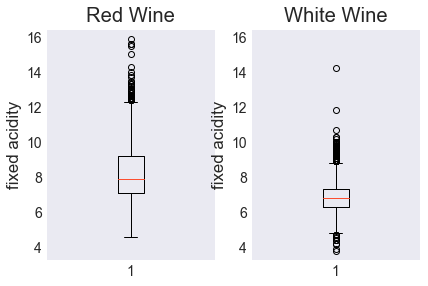

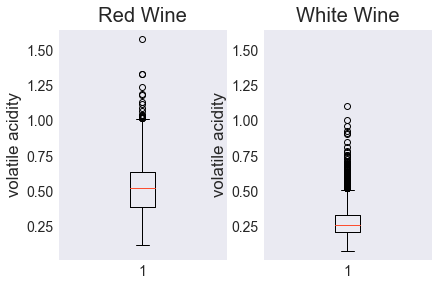

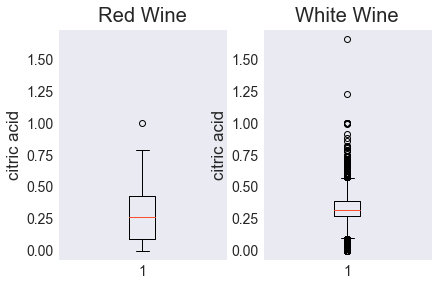

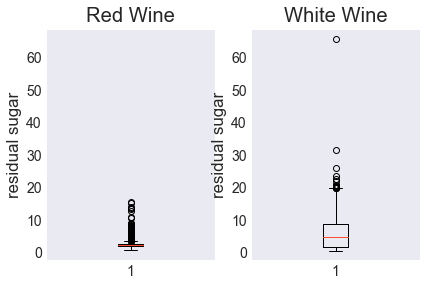

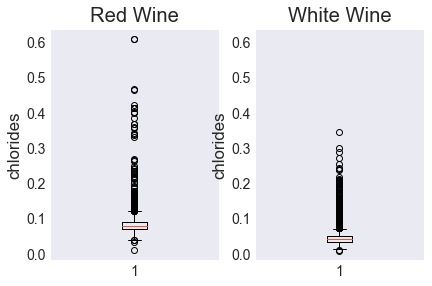

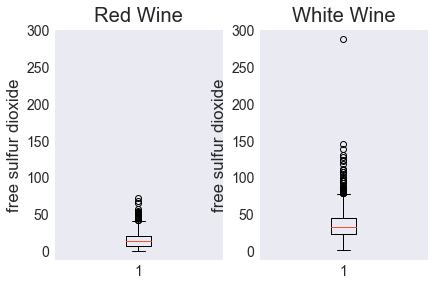

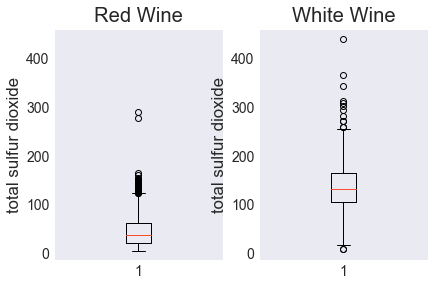

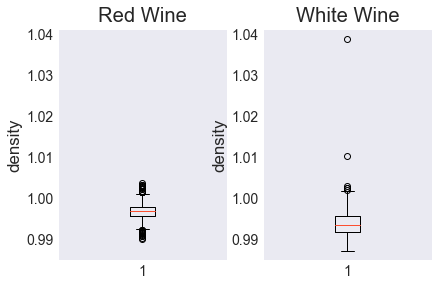

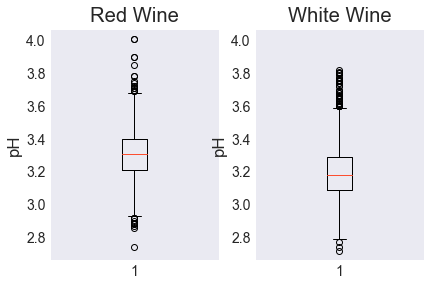

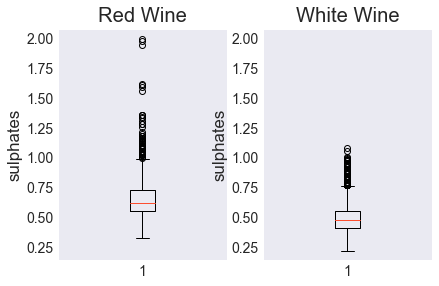

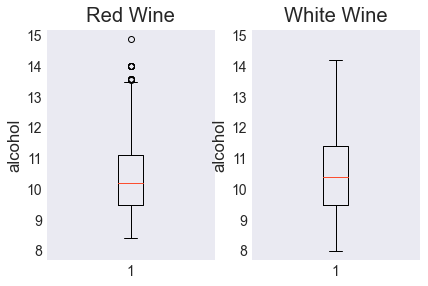

In [85]:
## Red Wine and White Wine Comparison ## 

# With Matplotlib # 

features = red_wine.select_dtypes(include=['float64']).columns

for feature in features: 

    fig = plt.Figure()
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122, sharey=ax1)
    fig.set_size_inches(14,10)

    ax1.boxplot(x=red_wine[feature])
    ax1.title.set_text('Red Wine')
    ax1.set_ylabel(feature)


    ax2.boxplot(x=white_wine[feature])
    ax2.title.set_text('White Wine')
    ax2.set_ylabel(feature) 
    

    plt.show() 

In [ ]:
### 1 Feature, 2 Datasets (red, white)

sns.set_style('darkgrid')

features = red_wine.select_dtypes(include=['float64']).columns

for feature in features: 

    fig, axes = plt.subplots(1,2, sharey=True)
    fig.set_size_inches(14,7)
    
    
    sns.boxplot(ax=axes[0], x=red_wine['quality_label'],y=red_wine[feature])
    axes[0].title.set_text('Red Wine')
   
    sns.boxplot(ax=axes[1],x=white_wine['quality_label'],y=white_wine[feature])
    axes[1].title.set_text('White Wine')

plt.show()


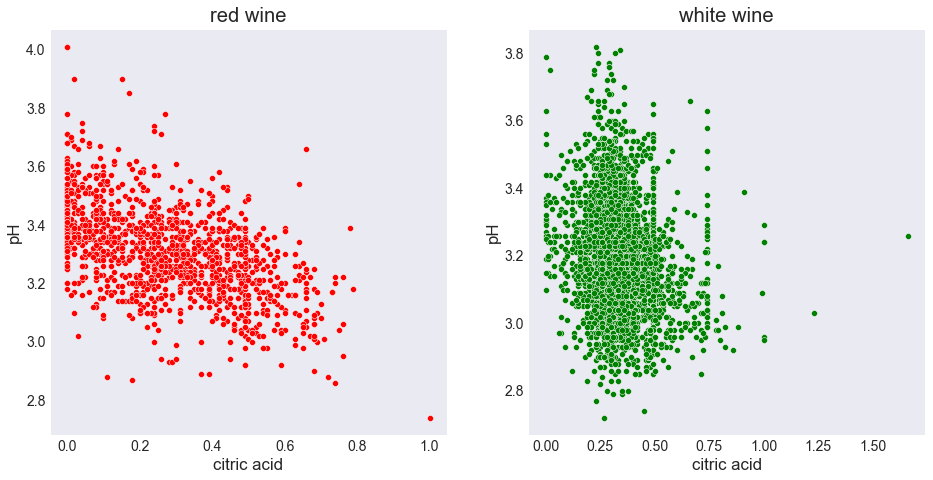

In [84]:
# One relationship, two datasets # 

sns.set_style('dark')

fig,axes = plt.subplots(1,2)
fig.set_size_inches(14,7)

sns.scatterplot(ax=axes[0], x=red_wine['citric acid'], y=red_wine['pH'], color = 'r')
axes[0].title.set_text('red wine')
sns.scatterplot(ax=axes[1], x=white_wine['citric acid'], y=white_wine['pH'],color='g')
axes[1].title.set_text('white wine')

plt.show()

# Univariate Analysis # 

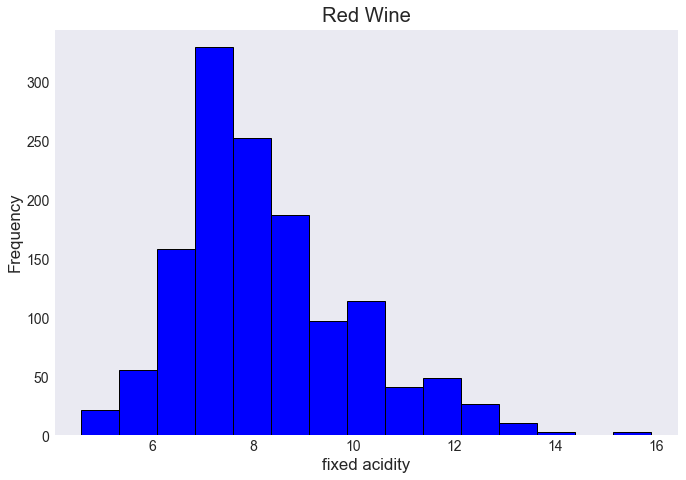

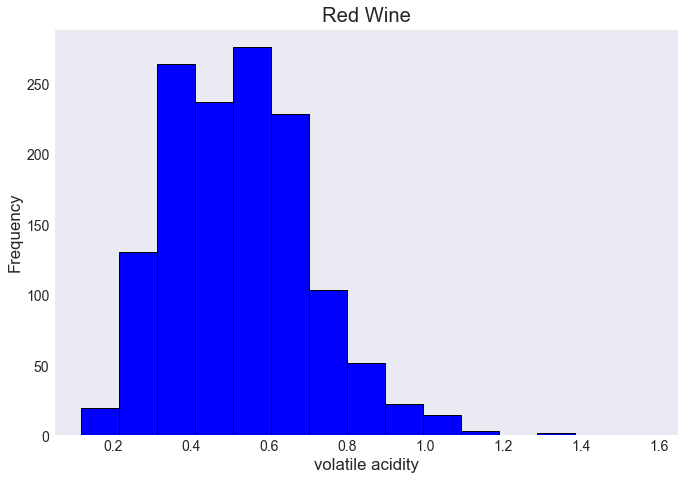

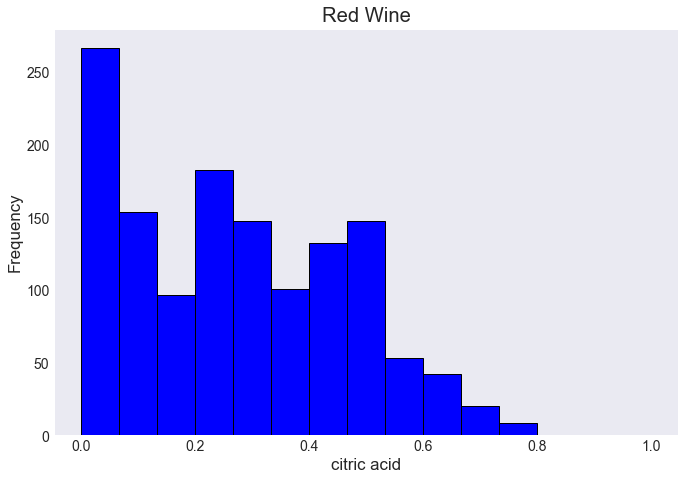

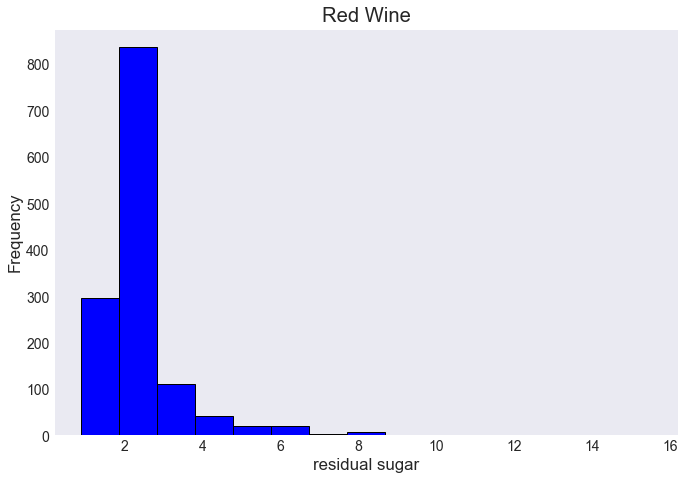

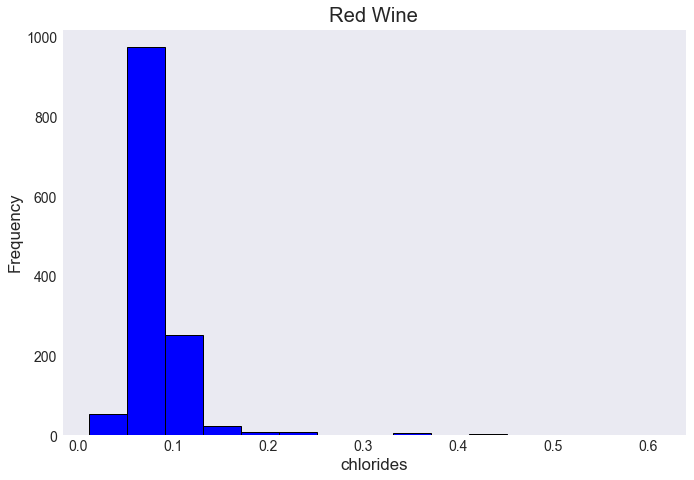

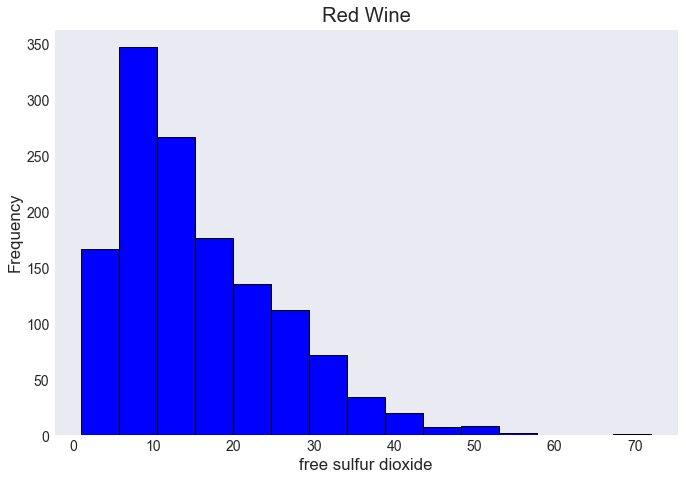

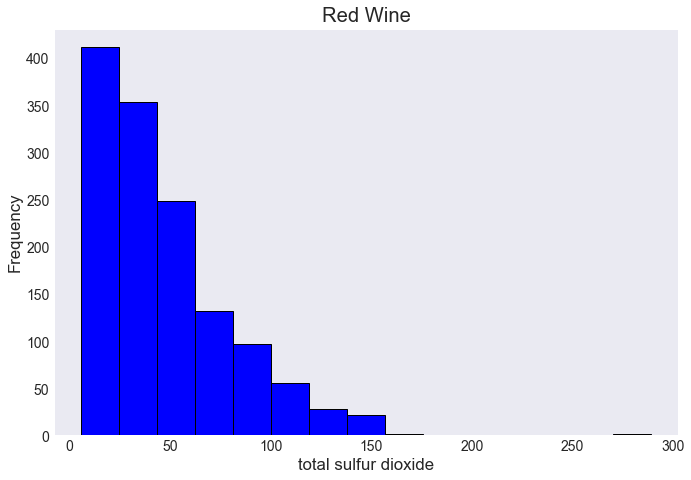

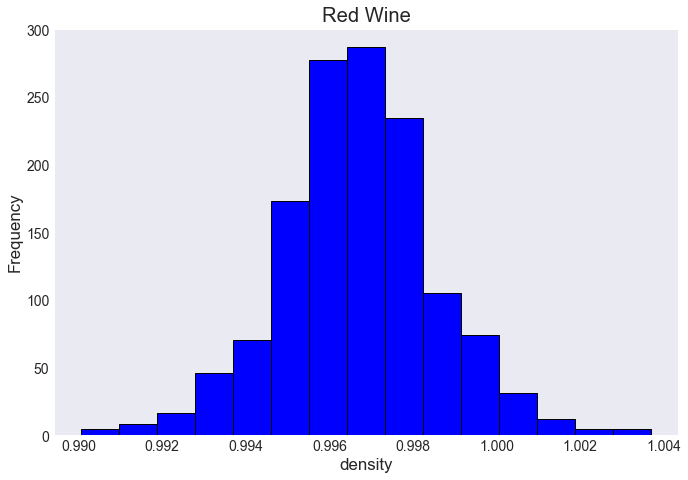

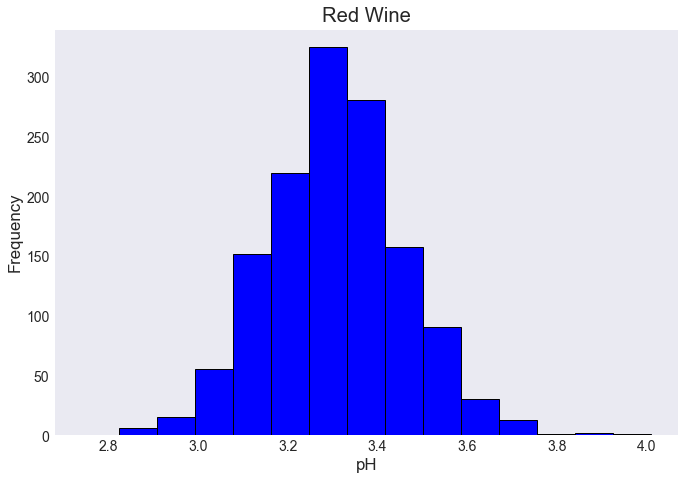

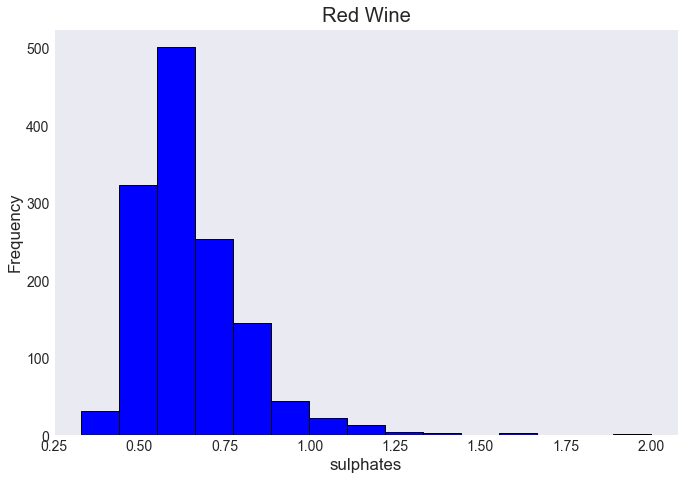

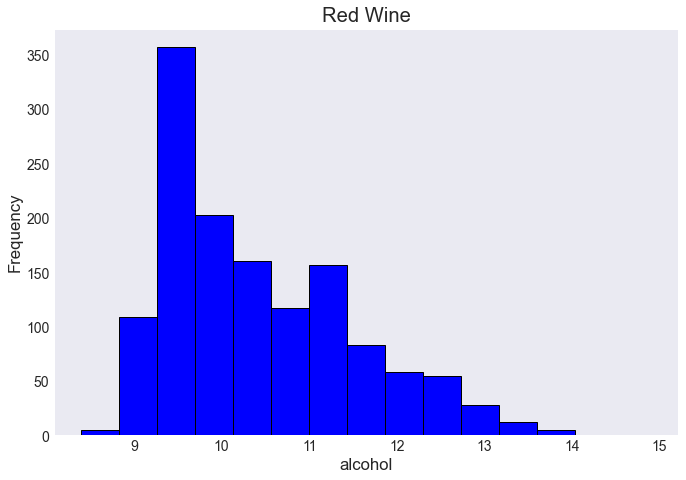

In [88]:

features = red_wine.select_dtypes(include=['float64']).columns

for feature in features: 

        #feature = 'fixed acidity'
        fig = plt.figure()
        fig.set_size_inches(10,7)
        red_wine[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)
        plt.title('Red Wine')
        plt.show() 
        #break

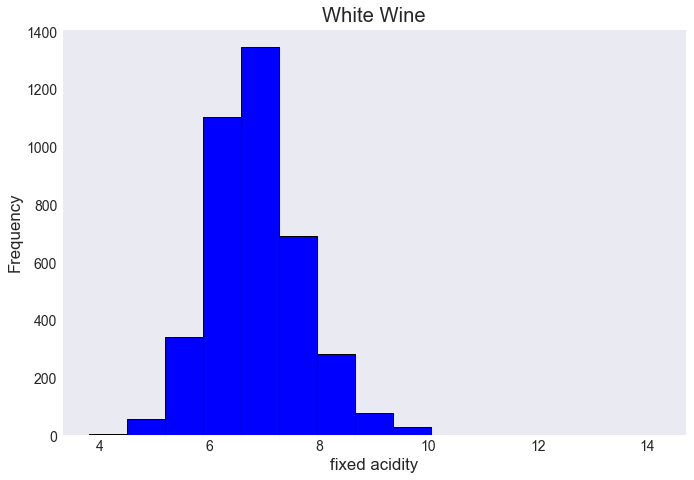

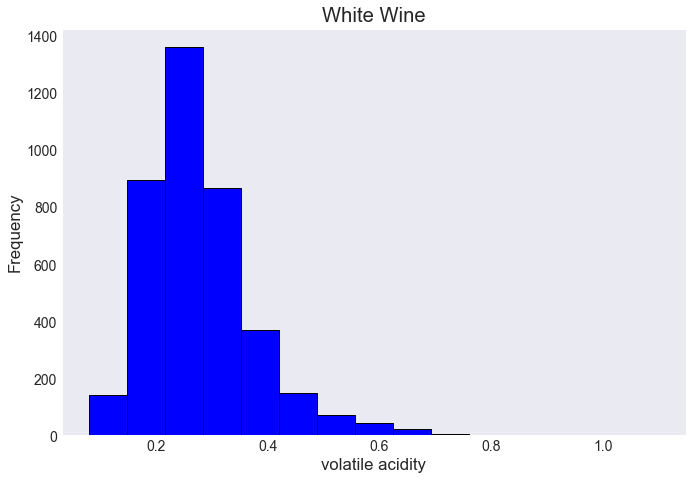

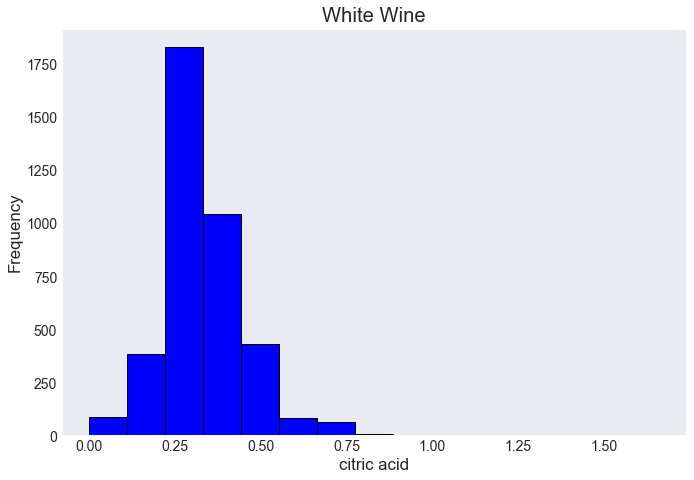

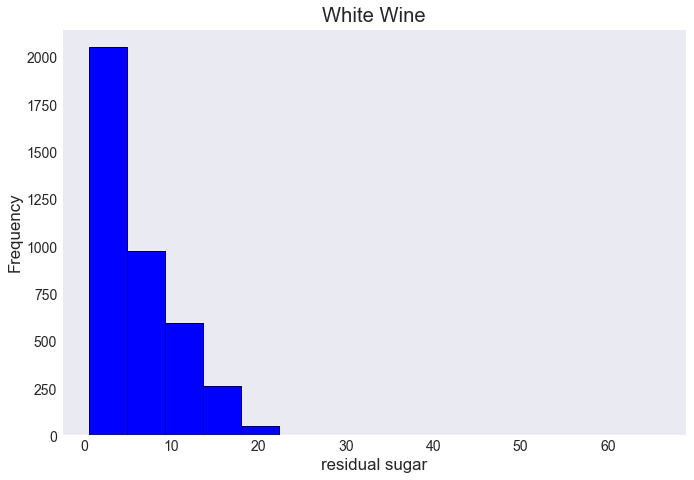

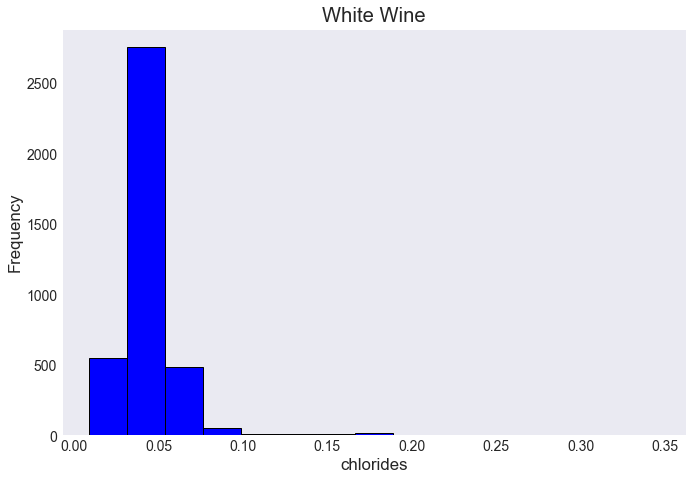

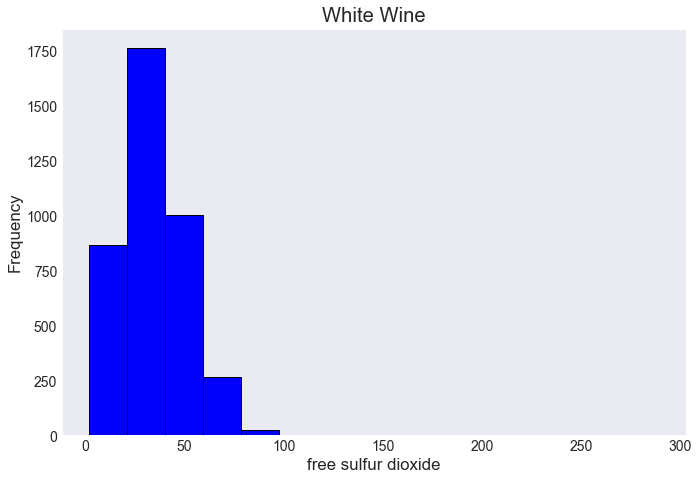

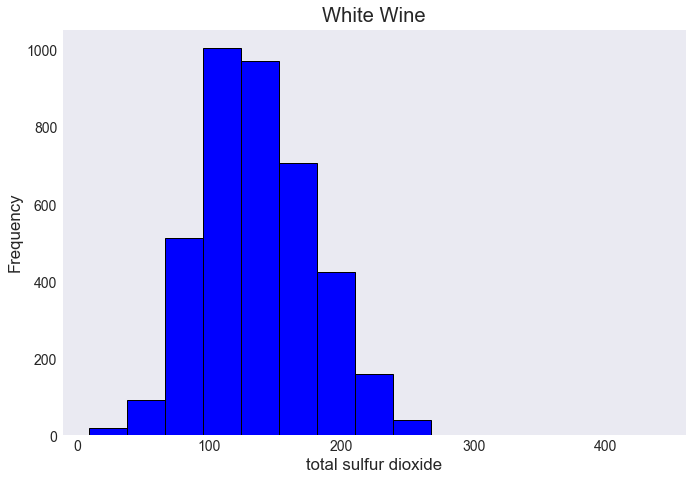

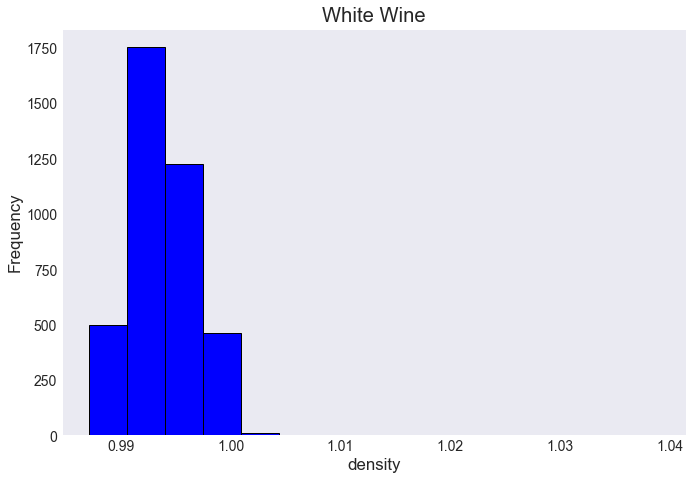

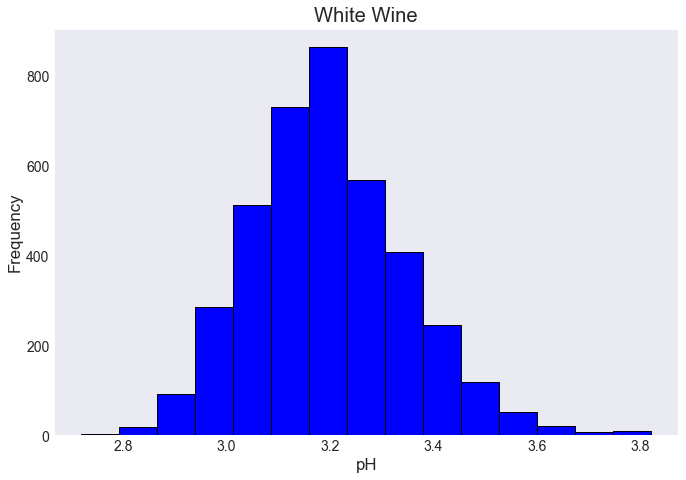

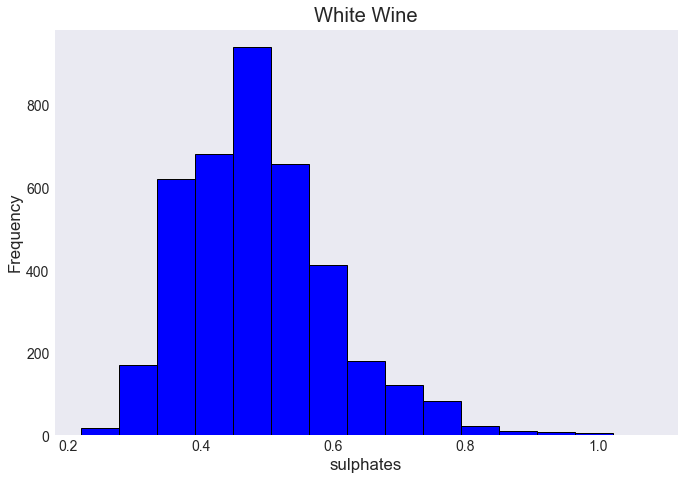

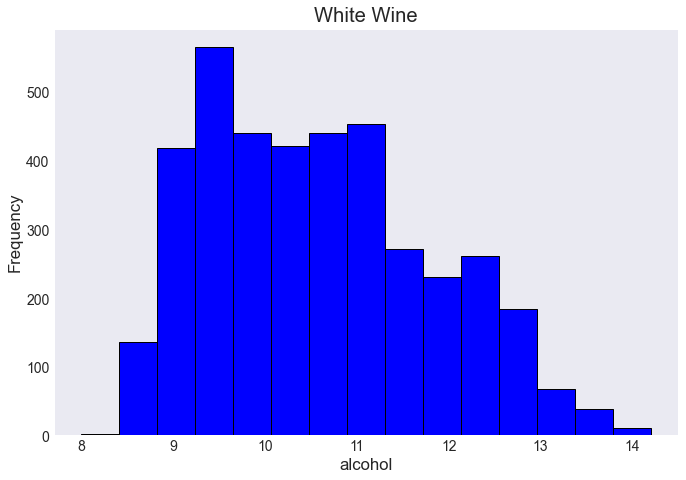

In [89]:
features = white_wine.select_dtypes(include=['float64']).columns

for feature in features: 

        #feature = 'fixed acidity'
        fig = plt.figure()
        fig.set_size_inches(10,7)
        white_wine[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)
        plt.title('White Wine')
        plt.show() 
        #break

In [ ]:
# Outlier Removal # 

def outlier_removal(df):

    # Compute IQR Score
    Q1 = df.quantile(0.05)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1   

    outliers = (df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))

    df = df[~outliers.any(axis=1)]

    return df